In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
s = 64
# reading the classes, labels, and images
label = []
d = '/kaggle/input/maldeb-dataset/debinew'#'/content/drive/MyDrive/malimg'
for filename in os.listdir(d):
  label.append(filename)
data = []
classes = []
for l in label: 
    path = os.path.join(d, l)
    for img in os.listdir(path):
        try:
          img_arr = cv2.imread(os.path.join(path, img))# cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (s, s)) # Reshaping images to preferred size
          data.append(resized_arr)
          classes.append(label.index(l))
        except Exception as e:
          print(e)

2024-05-27 04:39:19.320999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 04:39:19.321109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 04:39:19.460676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<class 'numpy.ndarray'>
data shape: (20854, 64, 64, 3)
<class 'numpy.ndarray'>
classes shape: (20854,)
[[[0.05098039 0.05098039 0.05098039]
  [0.30980392 0.30980392 0.30980392]
  [0.03529412 0.03529412 0.03529412]
  ...
  [0.04313725 0.04313725 0.04313725]
  [0.00392157 0.00392157 0.00392157]
  [0.04313725 0.04313725 0.04313725]]

 [[0.62745098 0.62745098 0.62745098]
  [0.15294118 0.15294118 0.15294118]
  [0.40392157 0.40392157 0.40392157]
  ...
  [0.41176471 0.41176471 0.41176471]
  [0.17647059 0.17647059 0.17647059]
  [0.65098039 0.65098039 0.65098039]]

 [[0.39607843 0.39607843 0.39607843]
  [0.57254902 0.57254902 0.57254902]
  [0.54117647 0.54117647 0.54117647]
  ...
  [0.23137255 0.23137255 0.23137255]
  [0.56078431 0.56078431 0.56078431]
  [0.70980392 0.70980392 0.70980392]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.10588235 0.10588235 0.10588235]
  [0.17254902 0.17254902 0.17254902]
  ...
  [0.13333333 0.13333333 0.13333333]
  [0.21960784 0.21960784 0.21960784]
  [0.12156

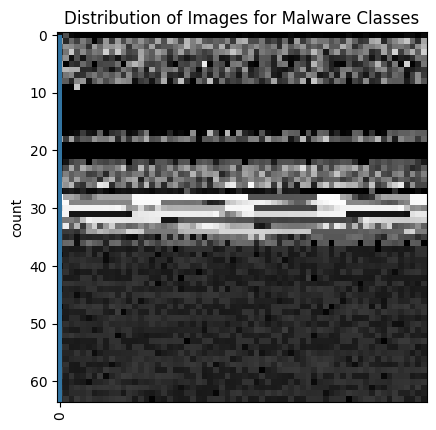

In [2]:
from keras.utils import to_categorical
# plotting the number of images in classes
plt.title('Distribution of Images for Malware Classes')
g = sns.countplot(classes)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

# converting to numpy array
data = np.array(data)
classes = np.array(classes)

# normalizing the data
data = data/255.0

# checking the type and shape of data and classes
print(type(data))
print('data shape:', data.shape)
print(type(classes))
print('classes shape:', classes.shape)

#looking at the first image
index = 0
print(data[index])
#looking as an image
img = plt.imshow(data[index])
#printing the label of the image
print('The image label is: ', classes[index])
#print the image class
print('The image class is: ', label[classes[index]])

classes_cat = to_categorical(classes)
#print all of the new labels
print(classes_cat)
#print an example of the new labels
print(classes_cat[0])

# splitting data in training and testing with test size of 0.2
x_train, x_test, y_train, y_test = train_test_split(data, classes_cat, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 0)
# converting x_train and x_test to numpy array and reshaped array to -1, 32, 32, 1
x_train = x_train.reshape(-1, s, s, 3)
y_train = np.array(y_train)
x_val = x_val.reshape(-1, s, s, 3)
y_val = np.array(y_val)
x_test = x_test.reshape(-1, s, s, 3)
y_test = np.array(y_test)

In [3]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,DepthwiseConv2D,BatchNormalization
from tensorflow.keras import layers 
from keras.utils import to_categorical 
from keras.layers import LeakyReLU, ReLU
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
epoch = 100
batch_size = 64

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
   # tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=512, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    tf.keras.layers.Conv2D(filters=512, kernel_size=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512),
    #tf.keras.layers.Relu(),
    tf.keras.layers.Dense(2, activation='softmax')
])


# compiling and printing the summary of model built
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 64, 64, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 64, 64, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_3              │ (None, 64, 64, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_4              │ (None, 64, 64, 256)    │         2,560 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_5              │ (None, 64, 64, 256)    │         2,560 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 512)    │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_6              │ (None, 64, 64, 512)    │         5,120 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 798,338 (3.05 MB)

 Trainable params: 798,338 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting the model and evaluating
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(x_val, y_val))#validation_split = 0.1
model.evaluate(x_test, y_test)[1]  

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:695: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-05-27 04:42:16.644410: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.55273, expected 3.01185
2024-05-27 04:42:16.644474: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 4.19788, expected 3.65699
2024-05-27 04:42:16.644489: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43: 3.91922, expected 3.37834
2024-05-27 04:42:16.644496: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 58: 4.30075, expected 3.75987
2024-05-27 04:42:16.644504: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 4.35068, expected 3.8098
2024-05-27 04:42:16.64

219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4992 - loss: 0.6932

2024-05-27 04:43:35.513633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4032: 1.70155, expected 1.40599
2024-05-27 04:43:35.513708: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4096: 3.07422, expected 2.48263
2024-05-27 04:43:35.513719: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4099: 3.964, expected 3.3724
2024-05-27 04:43:35.513729: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4157: 4.47381, expected 3.88221
2024-05-27 04:43:35.513738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4158: 4.67948, expected 4.08788
2024-05-27 04:43:35.513747: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4159: 2.81144, expected 2.21984
2024-05-27 04:43:35.513756: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4223: 4.10911, expected 3.51752
2024-05-27 04:43:35.513767: E externa

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4992 - loss: 0.6932

2024-05-27 04:44:08.543014: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.63097, expected 3.04522
2024-05-27 04:44:08.543070: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 2.79594, expected 2.21019
2024-05-27 04:44:08.543080: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 127: 4.75555, expected 4.16981
2024-05-27 04:44:08.543089: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 256: 4.4025, expected 3.81675
2024-05-27 04:44:08.543097: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 383: 4.73225, expected 4.14651
2024-05-27 04:44:08.543106: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 639: 4.85616, expected 4.27041
2024-05-27 04:44:08.543124: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1088: 4.17224, expected 3.5865
2024-05-27 04:44:08.543136: E external/local_

220/220 ━━━━━━━━━━━━━━━━━━━━ 121s 391ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 239ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.4996 - loss: 0.69

2024-05-27 06:12:23.591046: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.74267, expected 2.93226
2024-05-27 06:12:23.591106: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.81792, expected 3.00751
2024-05-27 06:12:23.591137: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.10301, expected 4.2926
2024-05-27 06:12:23.591149: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.26842, expected 3.45801
2024-05-27 06:12:23.591159: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.07757, expected 4.26716
2024-05-27 06:12:23.591170: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.13438, expected 4.32397
2024-05-27 06:12:23.591180: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.00142, expected 5.191
2024-05-27 06:12:23.591190: E external/local_xla/xla/servi